In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import warnings
warnings.filterwarnings("ignore")
#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/My Drive/
import decimal
from decimal import Decimal

def A(T):
    return 2*sigma/(rho_l*R_v*T)

def Kohler1(r,kappa,r_d,T):
    return (r**3-r_d**3)/(r**3-(1-kappa)*r_d**3)*np.exp(A(T)/r)

def Kohler2(r,kappa,r_d,T):
    return 1+ A(T)/r -kappa*(r_d**3)/(r**3)

def Kohler2_derivative(r,kappa,r_d,T):
    return -A(T)/(r**2) +3*kappa*r_d**3/(r**4)

def maximum(kappa,r_d,T):
    r_act=np.sqrt(3*kappa*r_d**3/A(T))
    return [r_act,Kohler2(r_act,kappa,r_d,T)]

def set_plot():
  plt.xscale('log')
  plt.ylim(-0.02,0.02)
  plt.xticks([10**(-8),10**(-7),10**(-6),10**(-5)],['0.01','0.1','1','10'])
  y=np.array(np.arange(-0.02,0.025,0.005))
  y_ticks=[str(np.round(100*s,2)) for s in y]
  plt.yticks(y,y_ticks)
  plt.rcParams['figure.figsize'] = [6, 4]
  plt.plot(r,np.full(10000,0),color='grey',linewidth=0.5)
  plt.xlabel('Radius [$\mu$m]')
  plt.ylabel('Supersaturation [%]')
  plt.show()
    
def F_d(T,p):
  p0 = 101325
  T0 = 273
  D=2.11*10**(-5) *(T/T0)**(1.94) * (p0/p)
  e_s=2.53*10**11 * np.exp(-5.42*10**3 /T)
  return rho_l*R_v*T/(D*e_s)

def F_k(T):
  T0 = 273
  K = 4.1868*10**(-3) *(5.69 + 0.017*(T-T0))
  return (L/(R_v*T)-1)*rho_l*L/(K*T)

def newton_method(r0,S,kappa,r_d,T):
  r=[r0]
  for n in range(10**6):
    h=-(Kohler2(r[n],kappa,r_d,T)-S)/Kohler2_derivative(r[n],kappa,r_d,T)
    r.append(r[n]+h)
    if np.abs(r[-1]-r[-2])<0.001*10**(-6):
      break
  return r[-1]
  
R_v=461.5
sigma=0.07564
rho_l=1000
T=273
L=2500*10**3
r=np.linspace(0.01*10**(-6),10*10**(-6),10000)

<h2> Two forms of $\kappa$-Köhler equation  </h2>

The plot below shows $\kappa$-Köhler curve calculated from two equations, exact and approximated.

The exact equation (blue line):
\begin{equation}
S_{eq}(r,\kappa,r_d,T)=\frac{r^3-r_d^3}{r^3-r_d^3 (1-\kappa)}exp \left (\frac{A(T)}{r} \right)
\end{equation}

The approximated equation (orange dots):
\begin{equation}
S_{eq}(r,\kappa,r_d,T)= 1+\frac{A(T)}{r}-\frac{\kappa r_d^3}{r^3}
\end{equation}

The plot shows also the difference between exact and approximated results (red line). The difference is significant for radii smaller than $r \thickapprox$ 0.03 $\mu$m.

For droplets with radii r > 0.03 $\mu$m, differences between exact and approximated results are negligible and both equations correctly describe the Köhler curve. 

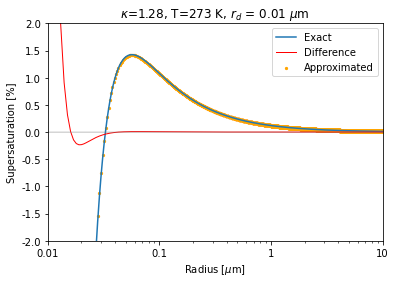

In [2]:
kappa=1.28
r_d=0.01*10**(-6)
r=np.linspace(0.01*10**(-6),10*10**(-6),10000)
S1=Kohler1(r,kappa,r_d,T)-1
S2=Kohler2(r,kappa,r_d,T)-1
plt.plot(r,S1)
plt.scatter(r,S2,marker='.',s=20,c='orange')
plt.plot(r,S1-S2, c='r',linewidth=1)
plt.title('$\kappa$=1.28, T=273 K, $r_d$ = 0.01 $\mu$m')
plt.legend(['Exact','Difference','Approximated'])

def set_plot():
  plt.xscale('log')
  plt.xlim(0.01*10**(-6),10*10**(-6))
  plt.ylim(-0.02,0.02)
  plt.xticks([10**(-8),10**(-7),10**(-6),10**(-5)],['0.01','0.1','1','10'])
  y=np.array(np.arange(-0.02,0.025,0.005))
  y_ticks=[str(np.round(100*s,2)) for s in y]
  plt.yticks(y,y_ticks)
  plt.rcParams['figure.figsize'] = [6, 4]
  plt.plot(r,np.full(10000,0),color='grey',linewidth=0.5)
  plt.xlabel('Radius [$\mu$m]')
  plt.ylabel('Supersaturation [%]')
  plt.show()

set_plot()


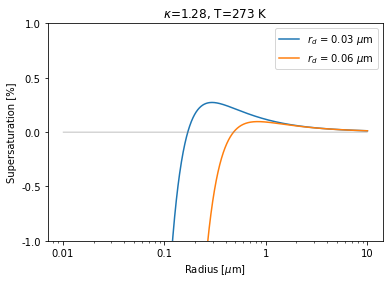

In [3]:
kappa=1.28
r_d=0.03*10**(-6)
S2=Kohler2(r,kappa,r_d,T)-1
plt.plot(r,S2)
plt.scatter(maximum(kappa,r_d,T)[0],maximum(kappa,r_d,T)[1])
#print(round(maximum(kappa,r_d,T)[0]*10**6,3),round(maximum(kappa,r_d,T)[1]*100,3))

kappa=1.28
r_d=0.06*10**(-6)
S2=Kohler2(r,kappa,r_d,T)-1
plt.plot(r,S2)
plt.scatter(maximum(kappa,r_d,T)[0],maximum(kappa,r_d,T)[1])
#print(round(maximum(kappa,r_d,T)[0]*10**6,3),round(maximum(kappa,r_d,T)[1]*100,3))

def set_plot_1():
  plt.xscale('log')
  plt.ylim(-0.01,0.01)
  plt.xticks([10**(-8),10**(-7),10**(-6),10**(-5)],['0.01','0.1','1','10'])
  y=np.array(np.arange(-0.01,0.015,0.005))
  y_ticks=[str(np.round(100*s,2)) for s in y]
  plt.yticks(y,y_ticks)
  plt.rcParams['figure.figsize'] = [6, 4]
  plt.plot(r,np.full(10000,0),color='grey',linewidth=0.5)
  plt.xlabel('Radius [$\mu$m]')
  plt.ylabel('Supersaturation [%]')
  plt.show()

plt.title('$\kappa$=1.28, T=273 K')
plt.legend(['$r_d$ = 0.03 $\mu$m','$r_d$ = 0.06 $\mu$m'])
set_plot_1()

$\kappa$-Köhler curves for NaCl, for two different values of dry radius.

For $r_d = 0.03~\mu m$, parameters of maximum are $r_{act}=0.29~\mu m$ and $S_{act}=1.0027$.
    
For $r_d = 0.06~\mu m$, parameters of maximum are $r_{act}=0.83~\mu m$ and $S_{act}=1.001$.

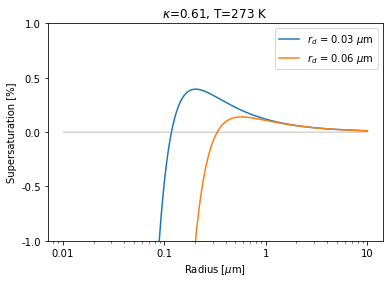

In [4]:
kappa=0.61
r_d=0.03*10**(-6)
S2=Kohler2(r,kappa,r_d,T)-1
plt.plot(r,S2)
plt.scatter(maximum(kappa,r_d,T)[0],maximum(kappa,r_d,T)[1])
#print(round(maximum(kappa,r_d,T)[0]*10**6,3),round(maximum(kappa,r_d,T)[1]*100,2))

kappa=0.61
r_d=0.06*10**(-6)
S2=Kohler2(r,kappa,r_d,T)-1
plt.plot(r,S2)
plt.scatter(maximum(kappa,r_d,T)[0],maximum(kappa,r_d,T)[1])
#print(round(maximum(kappa,r_d,T)[0]*10**6,3),round(maximum(kappa,r_d,T)[1]*100,3))

plt.title('$\kappa$=0.61, T=273 K')
plt.legend(['$r_d$ = 0.03 $\mu$m','$r_d$ = 0.06 $\mu$m'])
set_plot_1()

$\kappa$-Köhler curves for $NH_4NO_3$, for two different values of dry radius.

For $r_d = 0.03~\mu m$, parameters of maximum saturation are $r_{act}=0.20~\mu m$ and $S_{act}=1.004$.
    
For $r_d = 0.06~\mu m$, parameters of maximum saturation are $r_{act}=0.57 ~\mu m$ and $S_{act}=1.0014$.

<h2> Equations for the maximum of $\kappa$-Köhler curve: </h2>

\begin{equation}
    r_{act}=\sqrt{\frac{3 \kappa r_d^3}{A(T)}} 
\end{equation}

\begin{equation}
    S_{act}=S_{eq}~(r_{act})=1+\frac{2 \kappa r_d^3}{\left(\frac{3 \kappa r_d^3}{A(T)}\right)^{3/2}} = 1+ \frac{2\kappa r_d^3}{r_{act}^3}
\end{equation}

 <h2> Equation for dry radius: </h2>

\begin{equation}
    r_d~(S_{act},\kappa,T)= \left( \frac{2}{S_{act}-1} \right)^{2/3} \frac{A(T)}{3 \kappa^{1/3}}
\end{equation}

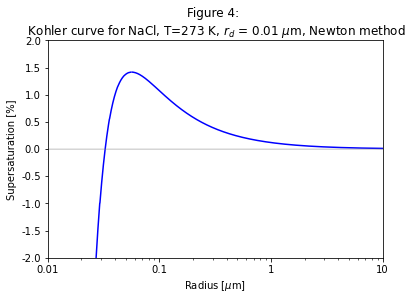

In [5]:
kappa=1.28
r_d=0.01*10**(-6)
S_max=maximum(kappa,r_d,T)[1]

S1=np.linspace(0.98,S_max,1000)
radi1=[]
for i in range(len(S1)):
  radi1.append(newton_method(0.01*10**(-6),S1[i],kappa,r_d,T))

S2=np.linspace(1.0001,S_max,1000)
radi2=[]
for i in range(len(S2)):
  radi2.append(newton_method(0.1*10**(-6),S2[i],kappa,r_d,T))

plt.plot(radi1,S1-1,c='b')
plt.plot(radi2,S2-1,c='b')
plt.title('Figure 4: \n Kohler curve for NaCl, T=273 K, $r_d$ = 0.01 $\mu$m, Newton method')
set_plot()

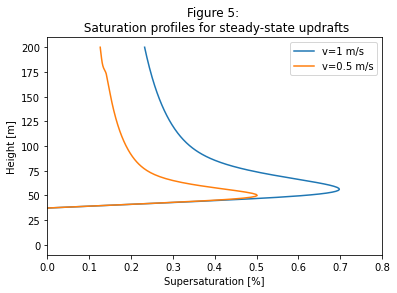

In [6]:
df1 = pd.read_fwf("parcel_model_vel=1.txt",header=0,names=['height', 'pressure', 'temp', 'saturation'])
df2 = pd.read_fwf("parcel_model_vel=05.txt",header=0,names=['height', 'pressure', 'temp', 'saturation'])

v1=1
S1=df1["saturation"].values
T1=df1["temp"].values
p1=df1["pressure"].values
h1=df1["height"].values

v2=0.5
S2=df2["saturation"].values
T2=df2["temp"].values
p2=df2["pressure"].values
h2=df2["height"].values

dz=0.1
h=np.linspace(0,200,2000)
S1=np.interp(h,h1,S1)
S2=np.interp(h,h2,S2)
T1=np.interp(h,h1,T1)
T2=np.interp(h,h2,T2)
p1=np.interp(h,h1,p1)
p2=np.interp(h,h2,p2)

plt.plot((S1-1)*100,h)
plt.plot((S2-1)*100,h)
plt.xlim(0,0.8)
plt.xlabel('Supersaturation [%]')
plt.ylabel('Height [m]')
plt.title('Figure 5: \n Saturation profiles for steady-state updrafts')
plt.legend(['v=1 m/s','v=0.5 m/s'])
plt.show()

In [7]:
class Droplet:
  def __init__(self,r_d,kappa):
    self.r=r_d
    self.r_d=r_d
    self.kappa=kappa
    self.r_history=[]

  def equilibrium_growth(self,S,T):  #S=S_eq
    r0=self.r
    r_new=newton_method(r0,S,self.kappa,self.r_d,T)
    if r_new>0:
      self.r=r_new
      self.r_history.append(self.r)

  def activation_growth(self,S,T,p,v):
    dr=(1/self.r) *((S-Kohler2(self.r,self.kappa,self.r_d,T))/(F_k(T) + F_d(T,p))) *dz/v
    self.r += dr
    self.r_history.append(self.r)

  def activation_growth_1(self,S,T,p,v):
    dr=(1/self.r) *((S-1)/(F_k(T) + F_d(T,p))) *dz/v
    self.r += dr
    self.r_history.append(self.r)


In [8]:
def droplet_growth(d,v,S_list,T_list,p_list,Kohler=True):
    for i in range(len(S_list)):
      r_act= maximum(d.kappa,d.r_d,T_list[i])[0]
      if d.r<r_act:
        d.equilibrium_growth(S_list[i],T_list[i])
    if d.r>1:
      del d.r_history[-1]
      d.r=d.r_history[-1]
    if Kohler:
      for i in range(len(d.r_history),len(S_list)):
          d.activation_growth(S_list[i],T_list[i],p_list[i],v)
    else:
      for i in range(len(d.r_history),len(S_list)):
          d.activation_growth_1(S_list[i],T_list[i],p_list[i],v)

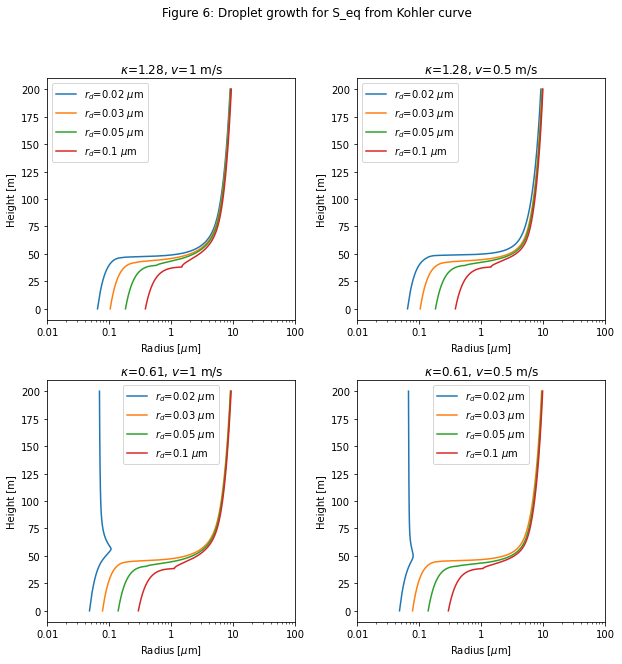

In [9]:
fig,([ax1,ax2],[ax3,ax4])=plt.subplots(2, 2,figsize=(10, 10))
plt.subplots_adjust(hspace=0.25, wspace=0.25)
fig.suptitle('Figure 6: Droplet growth for S_eq from Kohler curve')
def set_plot(ax):
  ax.set_xscale('log')
  ax.set_xlim(0.01*10**(-6),100*10**(-6))
  ax.set_xticks([10**(-8),10**(-7),10**(-6),10**(-5),10**(-4)])
  ax.set_xticklabels(['0.01','0.1','1','10','100'])
  ax.set_xlabel('Radius [$\mu$m]')
  ax.set_ylabel('Height [m]')
  ax.legend(['$r_d$=0.02 $\mu$m','$r_d$=0.03 $\mu$m','$r_d$=0.05 $\mu$m','$r_d$=0.1 $\mu$m'])

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),1.28),Droplet(0.03*10**(-6),1.28),Droplet(0.05*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
for d in [d1,d2,d3,d4]:
  droplet_growth(d,v1,S1,T1,p1)
  ax1.plot(d.r_history,h)
set_plot(ax1)
ax1.set_title('$\kappa$=1.28, $v$=1 m/s')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),1.28),Droplet(0.03*10**(-6),1.28),Droplet(0.05*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
for d in [d1,d2,d3,d4]:
  droplet_growth(d,v2,S2,T2,p2)
  ax2.plot(d.r_history,h)
set_plot(ax2)
ax2.set_title('$\kappa$=1.28, $v$=0.5 m/s')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),0.61),Droplet(0.03*10**(-6),0.61),Droplet(0.05*10**(-6),0.61),Droplet(0.1*10**(-6),0.61)]
for d in [d1,d2,d3,d4]:
  droplet_growth(d,v1,S1,T1,p1)
  ax3.plot(d.r_history,h)
set_plot(ax3)
ax3.set_title('$\kappa$=0.61, $v$=1 m/s')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),0.61),Droplet(0.03*10**(-6),0.61),Droplet(0.05*10**(-6),0.61),Droplet(0.1*10**(-6),0.61)]
for d in [d1,d2,d3,d4]:
  droplet_growth(d,v2,S2,T2,p2)
  ax4.plot(d.r_history,h)
set_plot(ax4)
ax4.set_title('$\kappa$=0.61, $v$=0.5 m/s')
plt.show()

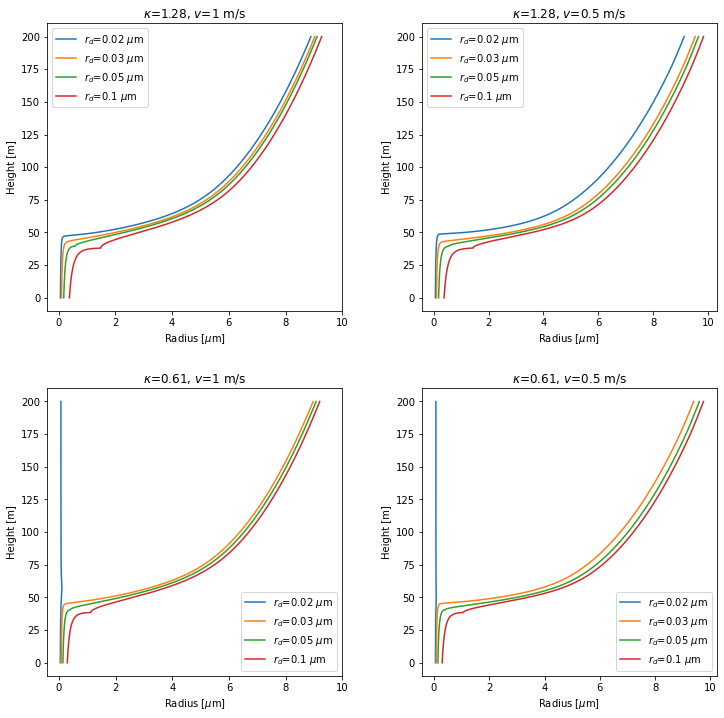

In [11]:
fig,([ax1,ax2],[ax3,ax4])=plt.subplots(2, 2,figsize=(12, 12))
plt.subplots_adjust(hspace=0.27, wspace=0.27)
#fig.suptitle('Figure 7: Droplet growth for S_eq from Kohler curve',y=0.94)
def set_plot(ax):
  ax.set_xticks([0,2*10**(-6),4*10**(-6),6*10**(-6),8*10**(-6),10*10**(-6)])
  ax.set_xticklabels(['0','2','4','6','8','10'])
  ax.set_xlabel('Radius [$\mu$m]')
  ax.set_ylabel('Height [m]')
  ax.legend(['$r_d$=0.02 $\mu$m','$r_d$=0.03 $\mu$m','$r_d$=0.05 $\mu$m','$r_d$=0.1 $\mu$m'])

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),1.28),Droplet(0.03*10**(-6),1.28),Droplet(0.05*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
for d in [d1,d2,d3,d4]:
  droplet_growth(d,v1,S1,T1,p1)
  ax1.plot(d.r_history,h)
set_plot(ax1)
ax1.set_title('$\kappa$=1.28, $v$=1 m/s')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),1.28),Droplet(0.03*10**(-6),1.28),Droplet(0.05*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
for d in [d1,d2,d3,d4]:
  droplet_growth(d,v2,S2,T2,p2)
  ax2.plot(d.r_history,h)
set_plot(ax2)
ax2.set_title('$\kappa$=1.28, $v$=0.5 m/s')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),0.61),Droplet(0.03*10**(-6),0.61),Droplet(0.05*10**(-6),0.61),Droplet(0.1*10**(-6),0.61)]
for d in [d1,d2,d3,d4]:
  droplet_growth(d,v1,S1,T1,p1)
  ax3.plot(d.r_history,h)
set_plot(ax3)
ax3.set_title('$\kappa$=0.61, $v$=1 m/s')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),0.61),Droplet(0.03*10**(-6),0.61),Droplet(0.05*10**(-6),0.61),Droplet(0.1*10**(-6),0.61)]
for d in [d1,d2,d3,d4]:
  droplet_growth(d,v2,S2,T2,p2)
  ax4.plot(d.r_history,h)
set_plot(ax4)
ax4.set_title('$\kappa$=0.61, $v$=0.5 m/s')
plt.show()

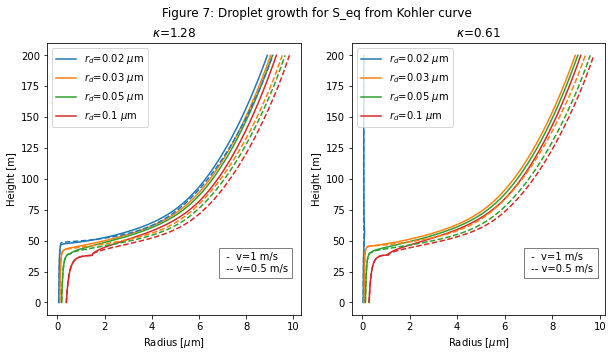

In [ ]:
fig,([ax1,ax2])=plt.subplots(1,2,figsize=(10, 5))
fig.suptitle('Figure 7: Droplet growth for S_eq from Kohler curve')
def set_plot(ax):
  ax.set_xticks([0,2*10**(-6),4*10**(-6),6*10**(-6),8*10**(-6),10*10**(-6)])
  ax.set_xticklabels(['0','2','4','6','8','10'])
  ax.set_xlabel('Radius [$\mu$m]')
  ax.set_ylabel('Height [m]')
  ax.legend(['$r_d$=0.02 $\mu$m','$r_d$=0.03 $\mu$m','$r_d$=0.05 $\mu$m','$r_d$=0.1 $\mu$m'],loc='upper left')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),1.28),Droplet(0.03*10**(-6),1.28),Droplet(0.05*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
droplet_growth(d1,v1,S1,T1,p1)
ax1.plot(d1.r_history,h)
droplet_growth(d2,v1,S1,T1,p1)
ax1.plot(d2.r_history,h)
droplet_growth(d3,v1,S1,T1,p1)
ax1.plot(d3.r_history,h)
droplet_growth(d4,v1,S1,T1,p1)
ax1.plot(d4.r_history,h)
[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),1.28),Droplet(0.03*10**(-6),1.28),Droplet(0.05*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
droplet_growth(d1,v2,S2,T2,p2)
ax1.plot(d1.r_history,h,'--',color='tab:blue')
droplet_growth(d2,v2,S2,T2,p2)
ax1.plot(d2.r_history,h,'--',color='tab:orange')
droplet_growth(d3,v2,S2,T2,p2)
ax1.plot(d3.r_history,h,'--',color='tab:green')
droplet_growth(d4,v2,S2,T2,p2)
ax1.plot(d4.r_history,h,'--',color='tab:red')
set_plot(ax1)
ax1.set_title('$\kappa$=1.28')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),0.61),Droplet(0.03*10**(-6),0.61),Droplet(0.05*10**(-6),0.61),Droplet(0.1*10**(-6),0.61)]
droplet_growth(d1,v1,S1,T1,p1)
ax2.plot(d1.r_history,h)
droplet_growth(d2,v1,S1,T1,p1)
ax2.plot(d2.r_history,h)
droplet_growth(d3,v1,S1,T1,p1)
ax2.plot(d3.r_history,h)
droplet_growth(d4,v1,S1,T1,p1)
ax2.plot(d4.r_history,h)
[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),0.61),Droplet(0.03*10**(-6),0.61),Droplet(0.05*10**(-6),0.61),Droplet(0.1*10**(-6),0.61)]
droplet_growth(d1,v2,S2,T2,p2)
ax2.plot(d1.r_history,h,'--',color='tab:blue')
droplet_growth(d2,v2,S2,T2,p2)
ax2.plot(d2.r_history,h,'--',color='tab:orange')
droplet_growth(d3,v2,S2,T2,p2)
ax2.plot(d3.r_history,h,'--',color='tab:green')
droplet_growth(d4,v2,S2,T2,p2)
ax2.plot(d4.r_history,h,'--',color='tab:red')
set_plot(ax2)
ax2.set_title('$\kappa$=0.61')

ax1.text(7*10**(-6), 25, ' -  v=1 m/s \n -- v=0.5 m/s', fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.5))
ax2.text(7*10**(-6), 25, ' -  v=1 m/s \n -- v=0.5 m/s', fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.5))
plt.show()

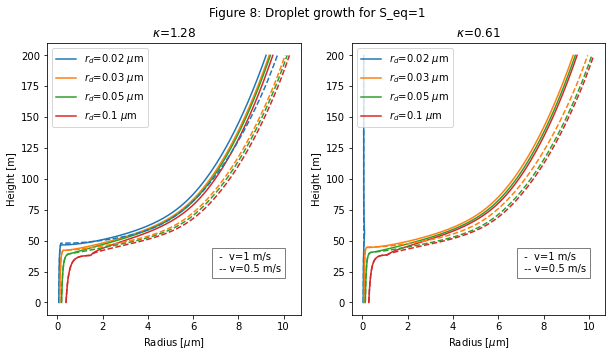

In [ ]:
fig,([ax1,ax2])=plt.subplots(1,2,figsize=(10, 5))
fig.suptitle('Figure 8: Droplet growth for S_eq=1')
def set_plot(ax):
  ax.set_xticks([0,2*10**(-6),4*10**(-6),6*10**(-6),8*10**(-6),10*10**(-6)])
  ax.set_xticklabels(['0','2','4','6','8','10'])
  ax.set_xlabel('Radius [$\mu$m]')
  ax.set_ylabel('Height [m]')
  ax.legend(['$r_d$=0.02 $\mu$m','$r_d$=0.03 $\mu$m','$r_d$=0.05 $\mu$m','$r_d$=0.1 $\mu$m'],loc='upper left')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),1.28),Droplet(0.03*10**(-6),1.28),Droplet(0.05*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
droplet_growth(d1,v1,S1,T1,p1,Kohler=False)
ax1.plot(d1.r_history,h)
droplet_growth(d2,v1,S1,T1,p1,Kohler=False)
ax1.plot(d2.r_history,h)
droplet_growth(d3,v1,S1,T1,p1,Kohler=False)
ax1.plot(d3.r_history,h)
droplet_growth(d4,v1,S1,T1,p1,Kohler=False)
ax1.plot(d4.r_history,h)
[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),1.28),Droplet(0.03*10**(-6),1.28),Droplet(0.05*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
droplet_growth(d1,v2,S2,T2,p2,Kohler=False)
ax1.plot(d1.r_history,h,'--',color='tab:blue')
droplet_growth(d2,v2,S2,T2,p2,Kohler=False)
ax1.plot(d2.r_history,h,'--',color='tab:orange')
droplet_growth(d3,v2,S2,T2,p2,Kohler=False)
ax1.plot(d3.r_history,h,'--',color='tab:green')
droplet_growth(d4,v2,S2,T2,p2,Kohler=False)
ax1.plot(d4.r_history,h,'--',color='tab:red')
set_plot(ax1)
ax1.set_title('$\kappa$=1.28')

[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),0.61),Droplet(0.03*10**(-6),0.61),Droplet(0.05*10**(-6),0.61),Droplet(0.1*10**(-6),0.61)]
droplet_growth(d1,v1,S1,T1,p1,Kohler=False)
ax2.plot(d1.r_history,h)
droplet_growth(d2,v1,S1,T1,p1,Kohler=False)
ax2.plot(d2.r_history,h)
droplet_growth(d3,v1,S1,T1,p1,Kohler=False)
ax2.plot(d3.r_history,h)
droplet_growth(d4,v1,S1,T1,p1,Kohler=False)
ax2.plot(d4.r_history,h)
[d1,d2,d3,d4]=[Droplet(0.02*10**(-6),0.61),Droplet(0.03*10**(-6),0.61),Droplet(0.05*10**(-6),0.61),Droplet(0.1*10**(-6),0.61)]
droplet_growth(d1,v2,S2,T2,p2,Kohler=False)
ax2.plot(d1.r_history,h,'--',color='tab:blue')
droplet_growth(d2,v2,S2,T2,p2,Kohler=False)
ax2.plot(d2.r_history,h,'--',color='tab:orange')
droplet_growth(d3,v2,S2,T2,p2,Kohler=False)
ax2.plot(d3.r_history,h,'--',color='tab:green')
droplet_growth(d4,v2,S2,T2,p2,Kohler=False)
ax2.plot(d4.r_history,h,'--',color='tab:red')
set_plot(ax2)
ax2.set_title('$\kappa$=0.61')

ax1.text(7*10**(-6), 25, ' -  v=1 m/s \n -- v=0.5 m/s', fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.5))
ax2.text(7*10**(-6), 25, ' -  v=1 m/s \n -- v=0.5 m/s', fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.5))
plt.show()

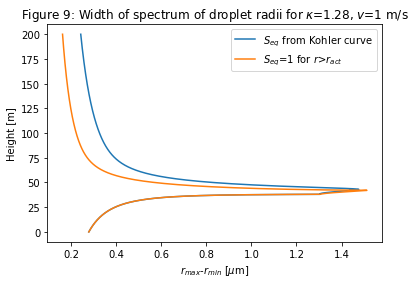

In [ ]:
[d_min,d_max]=[Droplet(0.03*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
for d in [d_min,d_max]:
  droplet_growth(d,v1,S1,T1,p1)
  d.r_history=np.array(d.r_history)
plt.plot((d_max.r_history-d_min.r_history)*10**6,h)

[d_min,d_max]=[Droplet(0.03*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
for d in [d_min,d_max]:
  droplet_growth(d,v1,S1,T1,p1,Kohler=False)
  d.r_history=np.array(d.r_history)
plt.plot((d_max.r_history-d_min.r_history)*10**6,h)

plt.title('Figure 9: Width of spectrum of droplet radii for $\kappa$=1.28, $v$=1 m/s')
plt.xlabel('$r_{max}$-$r_{min}$ [$\mu$m]')
plt.ylabel('Height [m]')
plt.legend(['$S_{eq}$ from Kohler curve','$S_{eq}$=1 for $r$>$r_{act}$'])
plt.show()

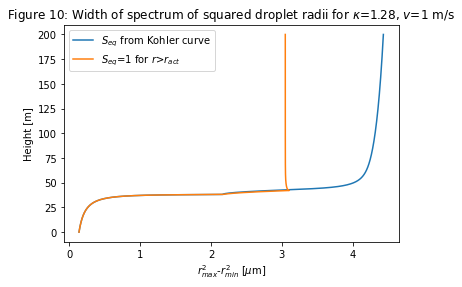

In [ ]:
[d_min,d_max]=[Droplet(0.03*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
for d in [d_min,d_max]:
  droplet_growth(d,v1,S1,T1,p1)
  d.r_history=np.array(d.r_history)
plt.plot((d_max.r_history**2 - d_min.r_history**2)*10**12,h)

[d_min,d_max]=[Droplet(0.03*10**(-6),1.28),Droplet(0.1*10**(-6),1.28)]
for d in [d_min,d_max]:
  droplet_growth(d,v1,S1,T1,p1,Kohler=False)
  d.r_history=np.array(d.r_history)
plt.plot((d_max.r_history**2 - d_min.r_history**2)*10**12,h)

plt.title('Figure 10: Width of spectrum of squared droplet radii for $\kappa$=1.28, $v$=1 m/s')
plt.xlabel('$r_{max}^2$-$r_{min}^2$ [$\mu$m]')
plt.ylabel('Height [m]')
plt.legend(['$S_{eq}$ from Kohler curve','$S_{eq}$=1 for $r$>$r_{act}$'])
plt.show()